In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('..')

from helper import nn
from helper import logistic_regression as lr
import numpy as np

# get data and weights

In [11]:
X_raw, y_raw = nn.load_data('ex4data1.mat', transpose=False)
X = np.insert(X_raw, 0, np.ones(X_raw.shape[0]), axis=1)
X.shape

(5000, 401)

In [12]:
y = nn.expand_y(y_raw)
y.shape

(5000, 10)

In [13]:
t1, t2 = nn.load_weight('ex4weights.mat')
t1.shape, t2.shape

((25, 401), (10, 26))

In [14]:
theta = nn.serialize(t1, t2)  # flatten params
theta.shape

(10285,)

# sigmoid gradient

In [15]:
nn.sigmoid_gradient(0)

0.25

# theta gradient
super hard to get this right... the dimension is so confusing

In [16]:
d1, d2 = nn.deserialize(nn.gradient(theta, X, y))

In [17]:
d1.shape, d2.shape

((25, 401), (10, 26))

# gradient checking
<img style="float: left;" src="../img/gradient_checking.png">

In [18]:
# nn.gradient_checking(theta, X, y, epsilon= 0.0001)

If your backpropagation implementation is correct,
the relative difference will be smaller than 10e-9 (assume epsilon=0.0001).
Relative Difference: 2.1452384871125636e-09

CPU times: user 4min 6s, sys: 1.28 s, total: 4min 7s
Wall time: 4min 6s


# regularized gradient
Use normal gradient + regularized term

<img style="float: left;" src="../img/nn_reg_grad.png">

In [19]:
# nn.gradient_checking(theta, X, y, epsilon=0.0001, regularized=True)

If your backpropagation implementation is correct,
the relative difference will be smaller than 10e-9 (assume epsilon=0.0001).
Relative Difference: 3.1923598616973077e-09

CPU times: user 4min 8s, sys: 1.1 s, total: 4min 9s
Wall time: 4min 8s


# ready to train the model

> remember to randomly initlized the parameters to break symmetry

take a look at the doc of this argument: `jac`

>jac : bool or callable, optional
Jacobian (gradient) of objective function. Only for CG, BFGS, Newton-CG, L-BFGS-B, TNC, SLSQP, dogleg, trust-ncg. **If jac is a Boolean and is True, fun is assumed to return the gradient along with the objective function.** If False, the gradient will be estimated numerically. jac can also be a callable returning the gradient of the objective. In this case, it must accept the same arguments as fun.

it means if your `backprop` function return `(cost, grad)`, you could set `jac=True`  

This is the implementation of http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise4.ipynb

but I choose to seperate them

In [25]:
res = nn.nn_training(X, y)
res

     fun: 0.3155309488099679
     jac: array([  1.28536076e-04,   8.87860916e-09,  -1.02521685e-08, ...,
         6.86764975e-05,   6.18839987e-05,  -6.48510378e-07])
 message: 'Max. number of function evaluations reached'
    nfev: 400
     nit: 28
  status: 3
 success: False
       x: array([  0.00000000e+00,   4.43930458e-05,  -5.12608426e-05, ...,
         5.77280823e-01,   5.63553257e+00,   4.35680398e-01])

# show accuracy

In [21]:
_, y_answer = nn.load_data('ex4data1.mat')
y_answer[:20]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10], dtype=uint8)

In [22]:
final_theta = res.x

In [23]:
nn.show_accuracy(final_theta, X, y_answer)

0.95820000000000005

# show hidden layer

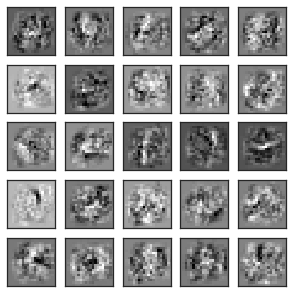

In [24]:
nn.plot_hidden_layer(final_theta)